In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [27]:
%matplotlib inline

In [28]:
titanic = pd.read_csv('titanic (1).csv')

In [29]:
titanic.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
titanic.drop(['PassengerId','Name','SibSp', 'Parch','Ticket','Cabin','Embarked'], axis='columns', inplace=True)

In [31]:
titanic.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [32]:
inputs = titanic.drop('Survived',axis='columns')
target = titanic.Survived

In [33]:
dummies = pd.get_dummies(inputs.Sex, dtype=int)

In [34]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [35]:
inputs = pd.concat([inputs, dummies], axis='columns')

In [36]:
inputs.drop(['Sex', 'male'], axis='columns', inplace=True)


In [37]:
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [38]:
miss = inputs.isna().sum()
print(miss)

Pclass      0
Age       177
Fare        0
female      0
dtype: int64


In [39]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [40]:
miss = inputs.isna().sum()
print(miss)

Pclass    0
Age       0
Fare      0
female    0
dtype: int64


<Axes: >

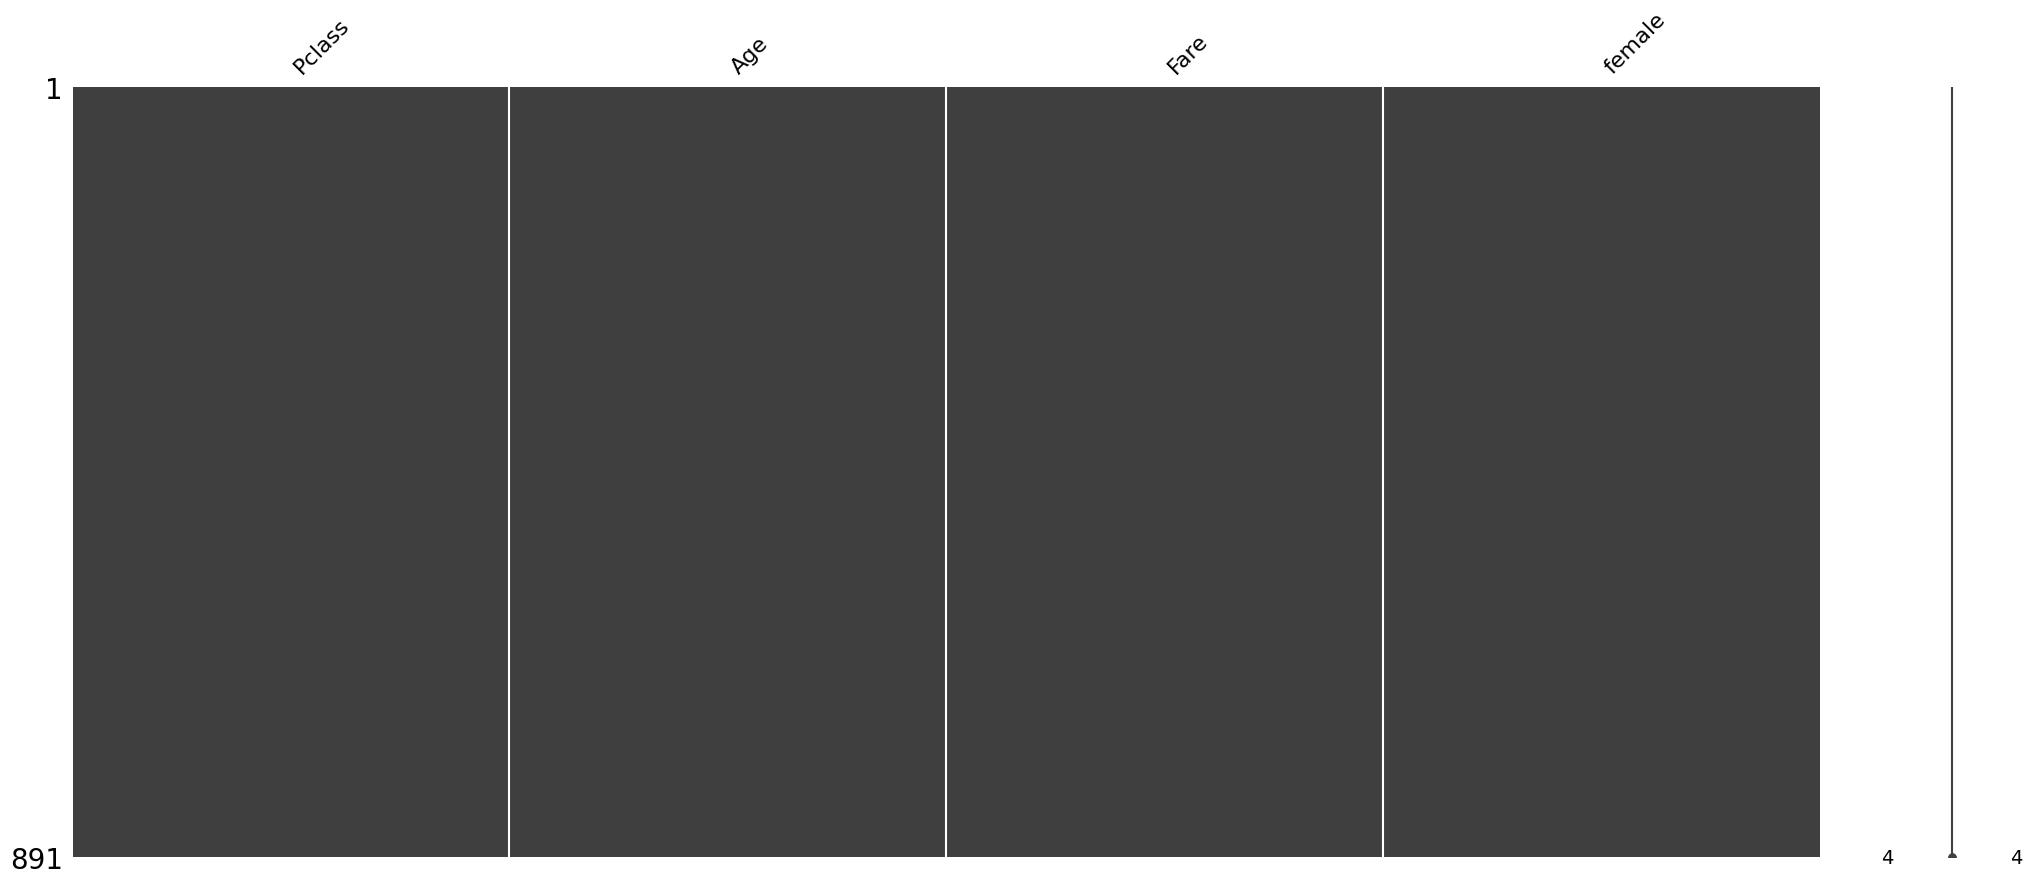

In [41]:
import missingno as msno

# Visualize missing data
msno.matrix(inputs)


In [42]:
# Count total missing values in the entire DataFrame
total_missing_values = inputs.isna().sum().sum()
print(f'Total missing values: {total_missing_values}')


Total missing values: 0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [45]:
model.fit(X_train,y_train)


GaussianNB()

In [46]:
model.score(X_test,y_test)


0.7686567164179104

In [47]:
model.predict(X_test[0:10])


array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [48]:
model.predict_proba(X_test[:10])


array([[0.93149793, 0.06850207],
       [0.33190386, 0.66809614],
       [0.68582854, 0.31417146],
       [0.96595555, 0.03404445],
       [0.79605224, 0.20394776],
       [0.01710639, 0.98289361],
       [0.23327366, 0.76672634],
       [0.39082548, 0.60917452],
       [0.39545723, 0.60454277],
       [0.91665119, 0.08334881]])

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.744     , 0.8       , 0.76      , 0.79032258, 0.79032258])


**Email spam classifier**


In [50]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
df.groupby('Category').describe()


Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [52]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [56]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [57]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9870782483847811

In [58]:

from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [59]:
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [60]:
clf.score(X_test,y_test)

0.9870782483847811

In [61]:
clf.predict(emails)


array([0, 1])

Machine Learning Tutorial - Naive Bayes: Exercise
Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.



In [62]:
from sklearn.datasets import load_wine

In [63]:
wine = load_wine()

In [64]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [65]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [66]:
X = df


In [67]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [74]:

X = wine.data
y = wine.target


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB

In [77]:
gp = GaussianProcessClassifier()
mnb = MultinomialNB()

In [78]:
gp.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

In [79]:
mnb.score(X_train, y_train)

0.8467741935483871

In [80]:
gp.score(X_train, y_train)


1.0

In [81]:
gp.predict(X_test)

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])